In [1]:
#####  LOADING AND EXTRACTING DATA   #####


import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle


def data_loader():
    
    # Load dataset file
    data_frame = pd.read_csv('training.csv')
    
    data_frame['Image'] = data_frame['Image'].apply(lambda i: np.fromstring(i, sep=' '))
    data_frame = data_frame.dropna()  # Get only the data with 15 keypoints
   
    # Extract Images pixel values
    imgs_array = np.vstack(data_frame['Image'].values)/ 255.0
    imgs_array = imgs_array.astype(np.float32)    # Normalize, target values to (0, 1)
    imgs_array = imgs_array.reshape(-1, 96, 96, 1)
        
    # Extract labels (key point cords)
    labels_array = data_frame[data_frame.columns[:-1]].values
    labels_array = (labels_array - 48) / 48    # Normalize, traget cordinates to (-1, 1)
    labels_array = labels_array.astype(np.float32) 
    
    # shuffle the train data
#     imgs_array, labels_array = shuffle(imgs_array, labels_array, random_state=9)  
    
    return imgs_array, labels_array

  


# # This snippet is just to check/verify data
# imgs, labels = data_loader()
# print(imgs.shape)
# print(labels.shape)

# n=0
# labels[n] = (labels[n]*48)+48
# image = np.squeeze(imgs[n])
# plt.imshow(image, cmap='gray')
# plt.plot(labels[n][::2], labels[n][1::2], 'ro')
# plt.show()
    


Bad key "text.kerning_factor" on line 4 in
/home/dipesh/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
######   BUILD, TRAIN AND SAVE THE CONVOLUTIONAL MODEL    ########


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Activation
from keras.layers import Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History
# from keras.optimizers import Adam


# Main model
def the_model():
    model = Sequential()
    
    model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:])) # Input shape: (96, 96, 1)
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    # Convert all values to 1D array
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(30))
    
    return model


X_train, y_train = data_loader()
print("Training datapoint shape: X_train.shape:{}".format(X_train.shape))
print("Training labels shape: y_train.shape:{}".format(y_train.shape))


epochs = 60
batch_size = 64

model = the_model()
hist = History()

checkpointer = ModelCheckpoint(filepath='checkpoint1.hdf5', 
                               verbose=1, save_best_only=True)

# Complie Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model_fit = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist], verbose=1)

model.save('model1.h5')




Using TensorFlow backend.


Training datapoint shape: X_train.shape:(2140, 96, 96, 1)
Training labels shape: y_train.shape:(2140, 30)
Train on 1712 samples, validate on 428 samples
Epoch 1/60
1712/1712 [==============================] - 13s 7ms/step - loss: 0.0446 - accuracy: 0.3014 - val_loss: 0.0124 - val_accuracy: 0.4322

Epoch 00001: val_loss improved from inf to 0.01239, saving model to checkpoint1.hdf5
Epoch 2/60
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0104 - accuracy: 0.6209 - val_loss: 0.0086 - val_accuracy: 0.4322

Epoch 00002: val_loss improved from 0.01239 to 0.00859, saving model to checkpoint1.hdf5
Epoch 3/60
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0072 - accuracy: 0.6898 - val_loss: 0.0082 - val_accuracy: 0.4322

Epoch 00003: val_loss improved from 0.00859 to 0.00825, saving model to checkpoint1.hdf5
Epoch 4/60
1712/1712 [==============================] - 11s 7ms/step - loss: 0.0063 - accuracy: 0.6875 - val_loss: 0.0076 - val_accuracy: 0.4322



1712/1712 [==============================] - 8s 5ms/step - loss: 0.0012 - accuracy: 0.8511 - val_loss: 0.0038 - val_accuracy: 0.5164

Epoch 00037: val_loss did not improve from 0.00378
Epoch 38/60
1712/1712 [==============================] - 9s 5ms/step - loss: 0.0012 - accuracy: 0.8475 - val_loss: 0.0037 - val_accuracy: 0.5304

Epoch 00038: val_loss improved from 0.00378 to 0.00367, saving model to checkpoint1.hdf5
Epoch 39/60
1712/1712 [==============================] - 9s 5ms/step - loss: 0.0012 - accuracy: 0.8417 - val_loss: 0.0037 - val_accuracy: 0.5561

Epoch 00039: val_loss did not improve from 0.00367
Epoch 40/60
1712/1712 [==============================] - 9s 5ms/step - loss: 0.0012 - accuracy: 0.8487 - val_loss: 0.0038 - val_accuracy: 0.5117

Epoch 00040: val_loss did not improve from 0.00367
Epoch 41/60
1712/1712 [==============================] - 9s 5ms/step - loss: 0.0011 - accuracy: 0.8581 - val_loss: 0.0037 - val_accuracy: 0.5140

Epoch 00041: val_loss did not improve fr

Using TensorFlow backend.


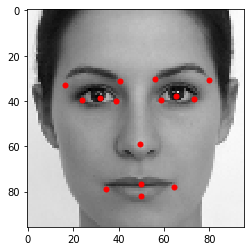

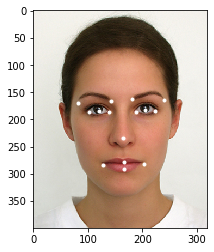

In [2]:
#####  TEST IMAGE FILE WITH THE MODEL  #####


import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import time

# Load the saved model
from keras.models import load_model
model = load_model('model1.h5')  # <-- Saved model path


def detect_points(face_img):
    me  = np.array(face_img)/255
    x_test = np.expand_dims(me, axis=0)
    x_test = np.expand_dims(x_test, axis=3)

    y_test = model.predict(x_test)
    label_points = (np.squeeze(y_test)*48)+48 
    
    return label_points
    
# Load haarcascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
dimensions = (96, 96)

# Enter the path to your test image
img = cv2.imread('test_image.jpg')

default_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
# faces = face_cascade.detectMultiScale(gray_img, 4, 6)

faces_img = np.copy(gray_img)

plt.rcParams["axes.grid"] = False


all_x_cords = []
all_y_cords = []

for i, (x,y,w,h) in enumerate(faces):
    
    h += 10
    w += 10
    x -= 5
    y -= 5
    
    just_face = cv2.resize(gray_img[y:y+h,x:x+w], dimensions)
    cv2.rectangle(faces_img,(x,y),(x+w,y+h),(255,0,0),1)
    
    scale_val_x = w/96
    scale_val_y = h/96
    
    label_point = detect_points(just_face)
    all_x_cords.append((label_point[::2]*scale_val_x)+x)
    all_y_cords.append((label_point[1::2]*scale_val_y)+y)
   
   
    plt.imshow(just_face, cmap='gray')
    plt.plot(label_point[::2], label_point[1::2], 'ro', markersize=5)
    plt.show()
    
    
plt.imshow(default_img)    
plt.plot(all_x_cords, all_y_cords, 'wo',  markersize=3)
plt.show()




In [4]:
####  TEST VIDEO FILE WITH THE MODEL  #####


from keras.models import load_model
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2
import time



model = load_model('model1.h5')  # <-- Saved model path


# input video file path
input_file = 'testVideo.mp4'


# output file path
output_filename = 'testVideo_out.avi'  


def get_points_main(img):

    def detect_points(face_img):
        me  = np.array(face_img)/255
        x_test = np.expand_dims(me, axis=0)
        x_test = np.expand_dims(x_test, axis=3)

        y_test = model.predict(x_test)
        label_points = (np.squeeze(y_test)*48)+48


        return label_points

    # load haarcascade
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    dimensions = (96, 96)


    try:
        default_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        gray_img = cv2.cvtColor(default_img, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
#         faces = face_cascade.detectMultiScale(gray_img, 4, 6)

    except:
        return []

    faces_img = np.copy(gray_img)

    plt.rcParams["axes.grid"] = False


    all_x_cords = []
    all_y_cords = []


    for i, (x,y,w,h) in enumerate(faces):

        h += 10
        w += 10
        x -= 5
        y -= 5

        try:
            just_face = cv2.resize(gray_img[y:y+h,x:x+w], dimensions)
        except:
            return []
        cv2.rectangle(faces_img,(x,y),(x+w,y+h),(255,0,0),1)

        scale_val_x = w/96
        scale_val_y = h/96

        label_point = detect_points(just_face)

        all_x_cords.append((label_point[::2]*scale_val_x)+x)
        all_y_cords.append((label_point[1::2]*scale_val_y)+y)



    final_points_list = []
    try:
        for ii in range(len(all_x_cords)):
            for a_x, a_y in zip(all_x_cords[ii], all_y_cords[ii]):
                final_points_list.append([a_x, a_y])
    except:
        return final_points_list

    return final_points_list

# cap = cv2.VideoCapture(0)


cap = cv2.VideoCapture(input_file)
ret, frame = cap.read()
height, width, channel = frame.shape

fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter(output_filename, fourcc, 20.0, (width, height))


frame_no = 0
while cap.isOpened():

    a = time.time()
    
    frame_no += 1
    ret, frame = cap.read()
    if frame_no > 75*30:
        break
    if frame_no in range(60*30, 75*30):
        points = get_points_main(frame)

        try:
            overlay = frame.copy()
        except Exception as e:
            print(e)
            break

        for point in points:

            cv2.circle(frame, tuple(point), 3, (255, 255, 255), -1)
            # cv2.line(frame, last_point, tuple(point), (0,0,255), thickness=1)
            # cv2.putText(overlay, str(i), tuple(point), 1, 1, (255, 255, 255))

        if len(points) != 0:
            o_line_points = [[12,13], [13,11], [11,14], [14,12], [12,10], [11,10], [10,3], [12,5], [11,3], [10,5], [10,4], [10,2], [5,1], [1,4], [2,0], [0,3], [5,9], [9,8], [8,4], [2,6], [6,7], [7,3]]
            num_face = len(points)//15

            for i in range(num_face):
                line_points = np.array(o_line_points) + (15*(i))

                the_color = (189, 195, 199)

                for ii in line_points:
                    cv2.line(overlay, tuple(points[ii[0]]), tuple(points[ii[1]]), the_color, thickness=1)


        opacity = 0.3
        cv2.addWeighted(overlay, opacity, frame, 1 - opacity, 0, frame)

        out.write(frame)
        # cv2.imshow('frame',frame)
        b = time.time()
        print(str((b-a)))

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
           

cap.release()
cv2.destroyAllWindows()


0.1378622055053711
0.1316373348236084
0.1441202163696289
0.131089448928833
0.13727307319641113
0.13153791427612305
0.14586853981018066
0.13867950439453125
0.15036749839782715
0.1389164924621582
0.30617189407348633
0.13935637474060059
0.15810084342956543
0.15371489524841309
0.1550734043121338
0.14469623565673828
0.15455198287963867
0.14330601692199707
0.1369776725769043
0.13181447982788086
0.14716434478759766
0.15211272239685059
0.1545577049255371
0.15901780128479004
0.15471673011779785
0.14427852630615234
0.1642615795135498
0.14914298057556152
0.14961552619934082
0.16174578666687012
0.1536543369293213
0.15027642250061035
0.13628315925598145
0.14525651931762695
0.14257359504699707
0.15910911560058594
0.14703965187072754
0.1556072235107422
0.1493692398071289
0.19722461700439453
0.13198018074035645
0.13243579864501953
0.15373682975769043
0.14955949783325195
0.15816283226013184
0.14693403244018555
0.13965678215026855
0.13886070251464844
0.13506412506103516
0.14793920516967773
0.15355467796

0.20322203636169434
0.18116068840026855
0.19540786743164062
0.18947601318359375
0.1922621726989746
0.20999717712402344
0.20491814613342285
0.1919116973876953
0.2142648696899414
0.21286559104919434
0.19660186767578125
0.19329309463500977
0.19907736778259277
0.18794655799865723
0.18675971031188965
0.18893051147460938
0.18610835075378418
0.18411564826965332
0.17952418327331543
0.17950153350830078
0.13561296463012695
0.13923430442810059
0.13111209869384766
0.13757562637329102
0.12589216232299805
0.12833380699157715
0.12661147117614746
0.12661337852478027
0.12476992607116699
0.1368100643157959
0.1273341178894043
0.12722396850585938
0.13028502464294434
